In [1]:
# Dependencies and setup (will need more)
import numpy as np
import os
import pandas as pd
import warnings
import seaborn as sn
import matplotlib.pyplot as plt
warnings.simplefilter("ignore")

In [2]:
# Read CSV into DataFrame
annualData = pd.read_csv("resources/annualData.csv")

# Drop the null rows
annualData = annualData.dropna()

# Display DataFrame
annualData

,Year,usaVMT,iaVMT,iaGAS,mnVMT,mnGAS,ndVMT,ndGAS,sdVMT,sdGAS,...,mnLaws,sdLaws,ndLaws,wiLaws,iaGHG,mnGHG,ndGHG,sdGHG,wiGHG,evSHARE
15,2005,2989430000000,31568000000,1.575688e+09,56520774505,2.635352e+09,7443000000,334094175.0,8383000000,424310925.0,...,4.0,2.0,3.0,5.0,21.804555,37.647662,6.419279,6.257833,31.331999,0.0000
20,2010,2967266000000,31579000000,1.387475e+09,56762480425,2.218309e+09,8303000000,370400025.0,8861000000,439432275.0,...,11.0,9.0,7.0,12.0,21.055694,32.164674,6.876221,6.502886,30.012055,0.0000
21,2011,2950402000000,31411000000,1.340687e+09,56675049785,2.207060e+09,9166000000,391328850.0,8993000000,442646475.0,...,12.0,10.0,10.0,12.0,21.222488,31.813273,8.032738,6.489779,28.915370,0.0017
22,2012,2968570000000,31581000000,1.300947e+09,57018582582,2.266559e+09,10093000000,417152025.0,9077000000,413389950.0,...,12.0,12.0,10.0,12.0,20.301501,32.215651,9.144185,6.875894,28.870989,0.0021
23,2013,2988280000000,31542000000,1.261610e+09,56993471770,2.307029e+09,10100000000,435268425.0,9114000000,432163800.0,...,15.0,12.0,12.0,12.0,20.658018,30.666647,9.538938,6.599205,28.580062,0.0064
24,2014,3025656000000,32332000000,1.186003e+09,57393220230,2.289606e+09,10437000000,443669175.0,9226000000,411052350.0,...,17.0,12.0,12.0,13.0,21.278089,30.787186,10.149001,6.860861,30.751677,0.0082
25,2015,3095373000000,33109000000,1.149113e+09,57795772499,2.367989e+09,10079000000,430921950.0,9325000000,418065150.0,...,17.0,12.0,12.0,13.0,20.568721,30.408227,9.398703,6.953502,30.318151,0.0094
26,2016,3174408000000,33263000000,1.198349e+09,58856547322,2.407911e+09,9740000000,400058325.0,9508000000,427050300.0,...,20.0,12.0,12.0,13.0,21.693500,31.904079,8.440201,6.927084,29.988725,0.0099
27,2017,3212347000000,33751000000,1.181657e+09,59970745402,2.331281e+09,9703000000,402176775.0,9638000000,441222000.0,...,23.0,12.0,13.0,18.0,20.600683,31.390331,8.930514,6.711773,29.375210,0.0120
28,2018,3240327000000,33507000000,1.140457e+09,60438313272,2.271234e+09,9866000000,396844125.0,9736000000,453202200.0,...,28.0,12.0,13.0,19.0,20.808618,31.611875,9.480680,6.856952,31.257005,0.0254


In [3]:
# Print column names
for x in annualData.columns:
    print(x)

Year
usaVMT
iaVMT
iaGAS
mnVMT
mnGAS
ndVMT
ndGAS
sdVMT
sdGAS
wiVMT
wiGAS
iaPOP
iaAREA
iaDENS
mnPOP
mnAREA
mnDENS
ndPOP
ndAREA
ndDENS
sdPOP
sdAREA
sdDENS
wiPOP
wiAREA
wiDENS
mnTempHigh
mnTempLow
iaTempHigh
iaTempLow
wiTempHigh
wiTempLow
ndTempHigh
ndTempLow
sdTempHigh
sdTempLow
iaBicycle
iaCarpool
iaDrovealone
iaPublictransportation
iaTaximotorcycleorother
iaWalked
iaWorkedathome
mnBicycle
mnCarpool
mnDrovealone
mnPublictransportation
mnTaximotorcycleorother
mnWalked
mnWorkedathome
ndBicycle
ndCarpool
ndDrovealone
ndPublictransportation
ndTaximotorcycleorother
ndWalked
ndWorkedathome
sdBicycle
sdCarpool
sdDrovealone
sdPublictransportation
sdTaximotorcycleorother
sdWalked
sdWorkedathome
wiBicycle
wiCarpool
wiDrovealone
wiPublictransportation
wiTaximotorcycleorother
wiWalked
wiWorkedathome
iaLaws
mnLaws
sdLaws
ndLaws
wiLaws
iaGHG
mnGHG
ndGHG
sdGHG
wiGHG
evSHARE


# Feature Selection (Minnesota)

In [4]:
# Set features to be used as x values
features = annualData[["mnVMT", "mnGAS", "mnPOP", "mnDENS", "mnBicycle", "mnCarpool", "mnDrovealone",
                       "mnPublictransportation", "mnTaximotorcycleorother", "mnWalked", "mnWorkedathome",
                       "mnLaws","mnTempHigh", "mnTempLow", "evSHARE"]]
X = features
X.head()

,mnVMT,mnGAS,mnPOP,mnDENS,mnBicycle,mnCarpool,mnDrovealone,mnPublictransportation,mnTaximotorcycleorother,mnWalked,mnWorkedathome,mnLaws,mnTempHigh,mnTempLow,evSHARE
15,56520774505,2.635352e+09,5119598,58.889390,0.005303,0.094981,0.789822,0.028190,0.007959,0.027028,0.046718,4.0,53.3,32.8,0.0000
20,56762480425,2.218309e+09,5310828,61.089058,0.006517,0.085386,0.781922,0.034748,0.009060,0.028102,0.054265,11.0,53.2,32.5,0.0000
21,56675049785,2.207060e+09,5346143,61.495278,0.007100,0.093057,0.777315,0.034461,0.008725,0.027325,0.052017,12.0,52.3,31.8,0.0017
22,57018582582,2.266559e+09,5376643,61.846111,0.008136,0.089489,0.780284,0.032735,0.007863,0.028075,0.053418,12.0,56.1,34.3,0.0021
23,56993471770,2.307029e+09,5413479,62.269826,0.007893,0.085778,0.783857,0.035800,0.008588,0.029258,0.048827,15.0,49.5,29.1,0.0064


In [5]:
# Develop correlation matrix
X.corr()

corrMatrix = X.corr()

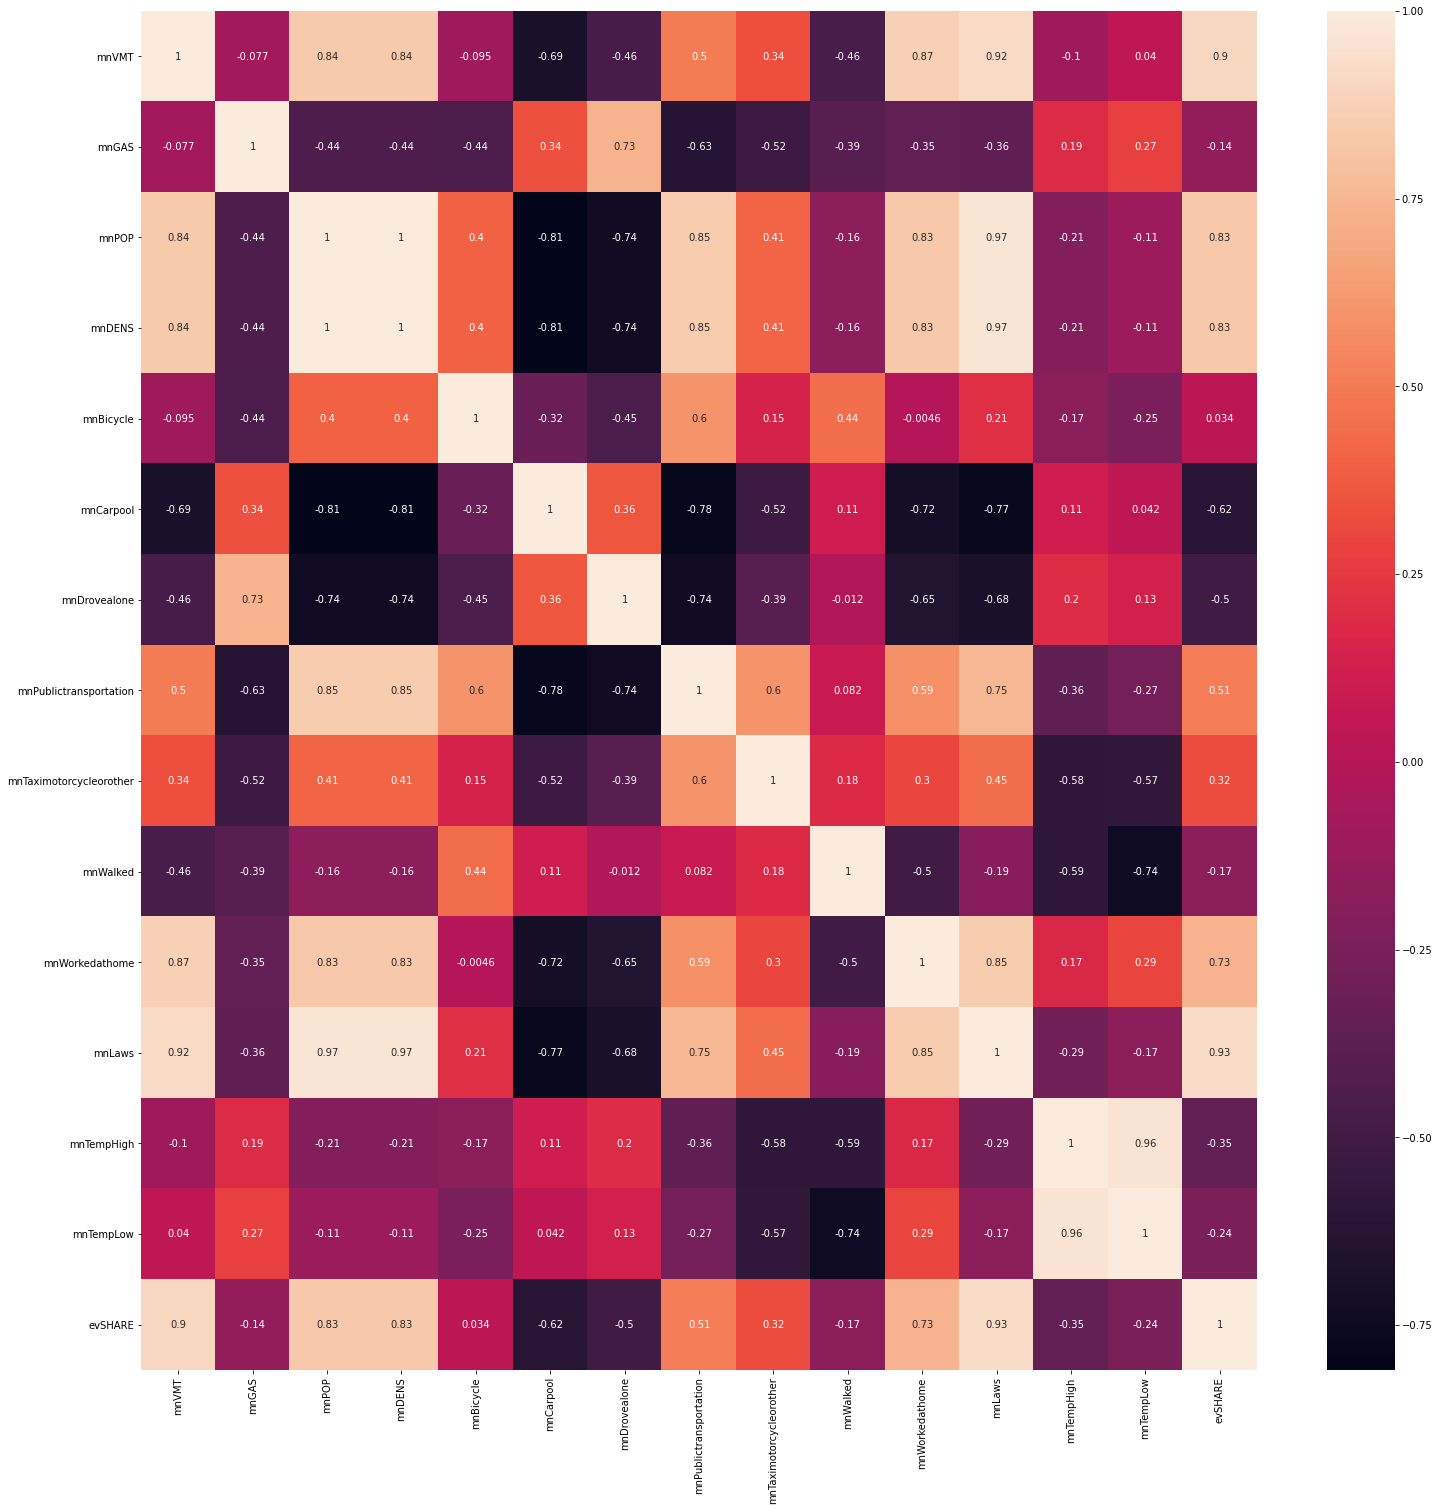

In [6]:
# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

In [7]:
# Removing dens, mnLaws, and mnTempLow from model.  R^2 before removal - Train: 1, Test: -2.145
# Re-set features to be used as x values
features = annualData[["mnVMT", "mnGAS", "mnPOP", "mnBicycle", "mnCarpool", "mnDrovealone",
                       "mnPublictransportation", "mnTaximotorcycleorother", "mnWalked", "mnWorkedathome",
                       "mnTempHigh", "evSHARE"]]
X = features
X.head()

,mnVMT,mnGAS,mnPOP,mnBicycle,mnCarpool,mnDrovealone,mnPublictransportation,mnTaximotorcycleorother,mnWalked,mnWorkedathome,mnTempHigh,evSHARE
15,56520774505,2.635352e+09,5119598,0.005303,0.094981,0.789822,0.028190,0.007959,0.027028,0.046718,53.3,0.0000
20,56762480425,2.218309e+09,5310828,0.006517,0.085386,0.781922,0.034748,0.009060,0.028102,0.054265,53.2,0.0000
21,56675049785,2.207060e+09,5346143,0.007100,0.093057,0.777315,0.034461,0.008725,0.027325,0.052017,52.3,0.0017
22,57018582582,2.266559e+09,5376643,0.008136,0.089489,0.780284,0.032735,0.007863,0.028075,0.053418,56.1,0.0021
23,56993471770,2.307029e+09,5413479,0.007893,0.085778,0.783857,0.035800,0.008588,0.029258,0.048827,49.5,0.0064


In [8]:
# Develop correlation matrix
X.corr()

corrMatrix = X.corr()

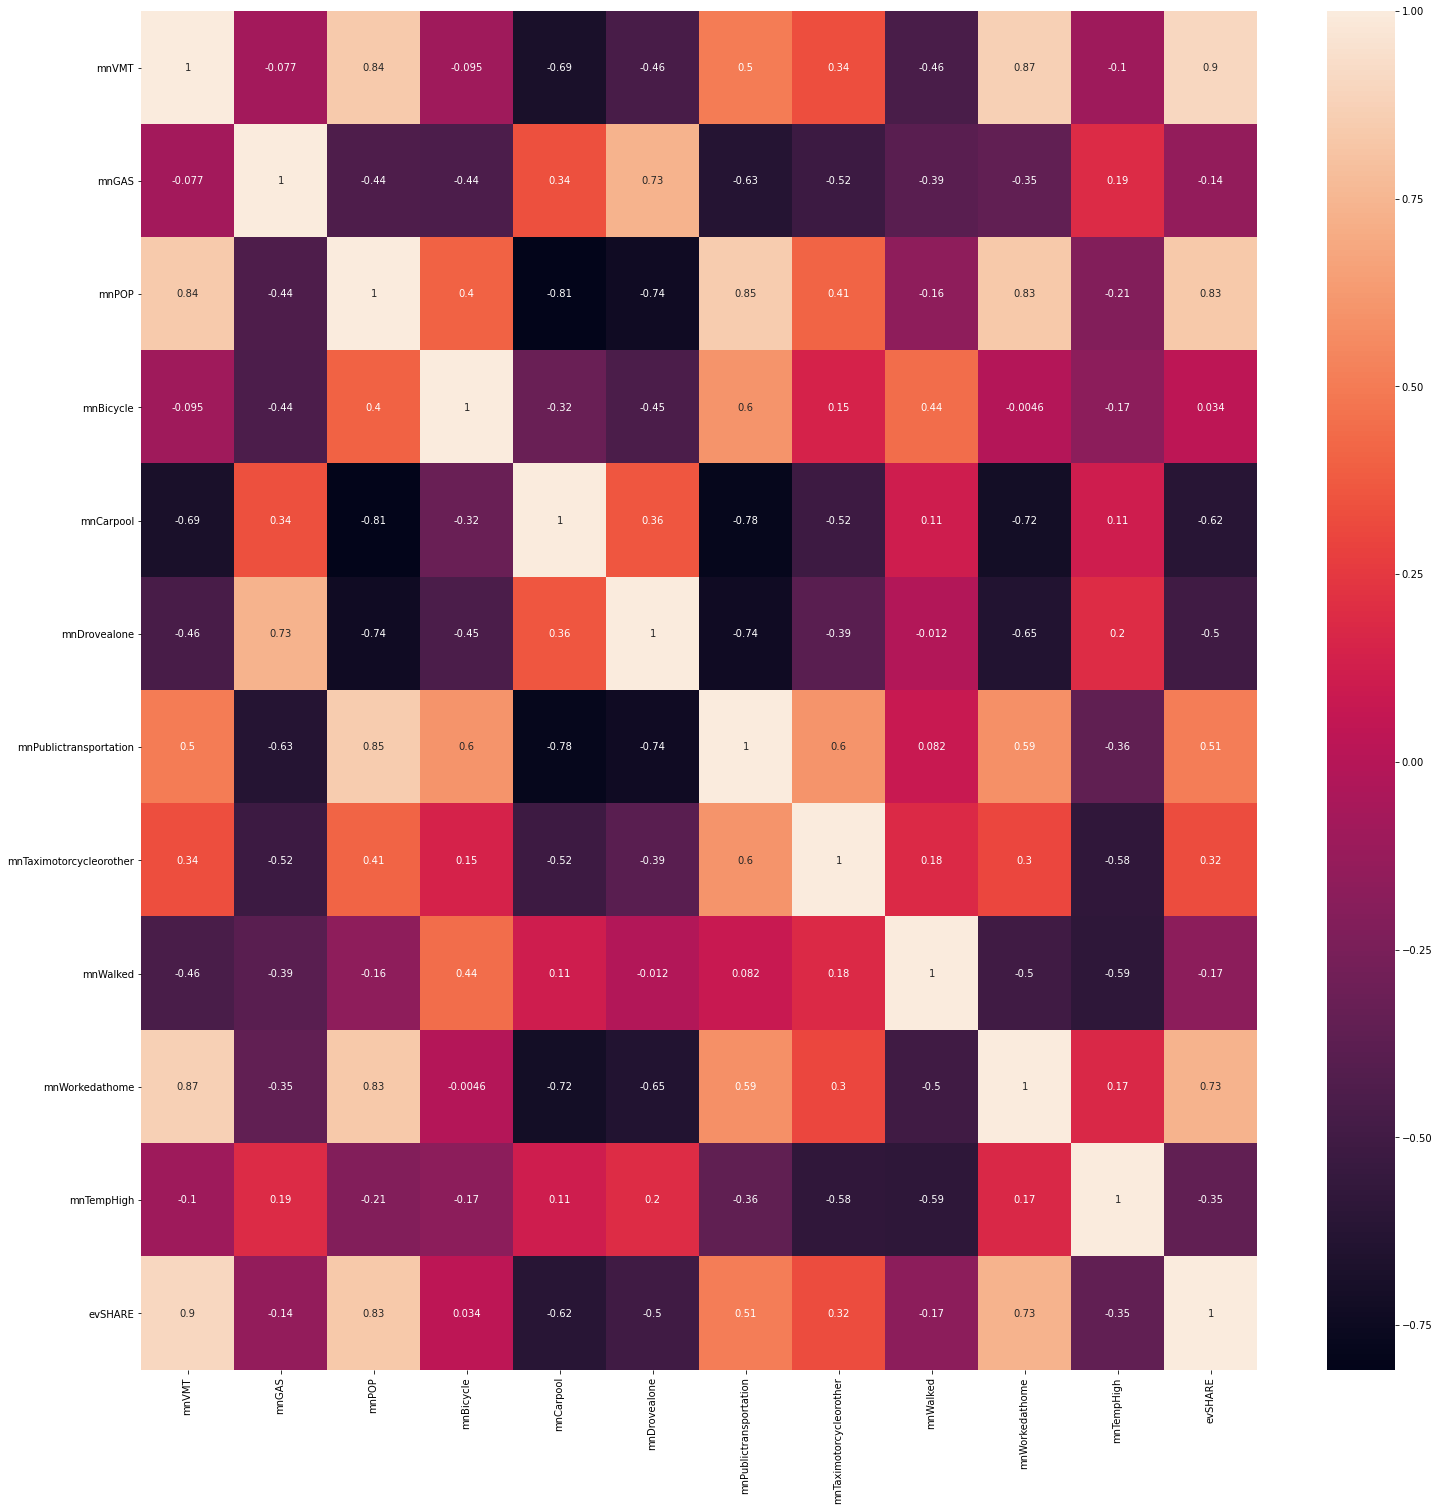

In [9]:
# Show result of correlation matrix
plt.figure(figsize=(25,25))

sn.heatmap(corrMatrix, annot=True)

plt.savefig("Resources/mnCorr.png")

plt.show()

# Multiple Linear Regression (Minnesota)

### Create a Train-Test Split
Use mnGHG for the y values.

In [10]:
# Set y values
y = annualData["mnGHG"].values.reshape(-1, 1)
print(X.shape, y.shape)

(10, 12) (10, 1)


In [11]:
print(y)

[[37.64766231]
 [32.16467366]
 [31.81327274]
 [32.21565089]
 [30.66664662]
 [30.78718642]
 [30.40822681]
 [31.90407869]
 [31.39033065]
 [31.61187525]]


In [12]:
# Dependencies and setup
from sklearn.model_selection import train_test_split

# Use train-test split to create training and testing data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)
X_train.head()

,mnVMT,mnGAS,mnPOP,mnBicycle,mnCarpool,mnDrovealone,mnPublictransportation,mnTaximotorcycleorother,mnWalked,mnWorkedathome,mnTempHigh,evSHARE
15,56520774505,2.635352e+09,5119598,0.005303,0.094981,0.789822,0.028190,0.007959,0.027028,0.046718,53.3,0.0000
26,58856547322,2.407911e+09,5522744,0.007040,0.085877,0.778296,0.036243,0.007981,0.026196,0.058367,54.2,0.0099
21,56675049785,2.207060e+09,5346143,0.007100,0.093057,0.777315,0.034461,0.008725,0.027325,0.052017,52.3,0.0017
28,60438313272,2.271234e+09,5606249,0.006389,0.083987,0.776912,0.035492,0.008866,0.027556,0.060798,50.6,0.0254
23,56993471770,2.307029e+09,5413479,0.007893,0.085778,0.783857,0.035800,0.008588,0.029258,0.048827,49.5,0.0064


### Pre-Processing
Scale the data using the MinMaxScaler and perform some feature selection.

In [13]:
# Dependencies and setup
from sklearn.preprocessing import StandardScaler

# Scale data
X_scale = StandardScaler().fit(X_train)
X_train_scaled = X_scale.transform(X_train)
X_test_scaled = X_scale.transform(X_test)

### Train the Linear Regression Model

In [14]:
# Dependencies and setup
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [15]:
# Fit the model to the training data and calculate scores for training and testing data
model.fit(X_train_scaled, y_train)
training_score = model.score(X_train_scaled, y_train)
testing_score = model.score(X_test_scaled, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 1.0
Testing Score: -1.8460053170198991


In [16]:
print(y_test)

[[31.39033065]
 [32.16467366]
 [30.78718642]]


### Coefficients (Independent Values)

In [17]:
# Display coefficient factors
print(model.coef_)

[[ 0.1797265   0.33419539 -0.32793296 -0.65179552  0.37995506  0.28926045
  -0.7586871  -0.14029074 -0.07791722  0.00523926  0.15637525  0.20150423]]


In [18]:
# Display intercept
print(model.intercept_)

[32.32391619]


In [19]:
# Assign numpy array to variable
coefs = model.coef_

# Assign array values to variables
vmt = coefs[0][0]
fuel = coefs[0][1]
pop = coefs[0][2]
bike = coefs[0][3]
pool = coefs[0][4]
solo = coefs[0][5]
bus = coefs[0][6]
taxi = coefs[0][7]
walk = coefs[0][8]
wfh = coefs[0][9]
highTemps = coefs[0][10]
ev = coefs[0][11]

In [20]:
# Display results
print(f"Vehicle Miles Traveled: if VMT continues its trend, then annual GHG emissions changes by {vmt * 100:.2f}%.")
print(f"Fuel Consumption: if fuel consumption continues its trend, then annual GHG emissions changes by {fuel * 100:.2f}%.")
print(f"Population: if population continues its trend, then annual GHG emissions changes by {pop * 100:.2f}%.")
print(f"Bicycles: if bicycle usage continues its trend, then annual GHG emissions changes by {bike * 100:.2f}%.")
print(f"Car Pools: if car pool ridership continues its trend, then annual GHG emissions changes by {pool * 100:.2f}%.")
print(f"Drive Alone: if solo drivers continues its trend, then annual GHG emissions changes by {solo * 100:.2f}%.")
print(f"Public Transportation: if mass transit ridership continues its trend, then annual GHG emissions changes by {bus * 100:.2f}%.")
print(f"Rideshare: if rideshare continues its trend, then annual GHG emissions changes by {taxi * 100:.2f}%.")
print(f"Walking: if walkers continues its trend, then annual GHG emissions changes by {walk * 100:.2f}%.")
print(f"Work From Home: if people working from home continues its trend, then annual GHG emissions changes by {wfh * 100:.2f}%.")
print(f"Temperatures: if average annual high temperatures continue their trend, then annual GHG emissions changes by {highTemps * 100:.2f}%.")
print(f"EV Market Share: if EV market share continues its trend, then annual GHG emissions changes by {ev * 100:.2f}%.")

Vehicle Miles Traveled: if VMT continues its trend, then annual GHG emissions changes by 17.97%.
Fuel Consumption: if fuel consumption continues its trend, then annual GHG emissions changes by 33.42%.
Population: if population continues its trend, then annual GHG emissions changes by -32.79%.
Bicycles: if bicycle usage continues its trend, then annual GHG emissions changes by -65.18%.
Car Pools: if car pool ridership continues its trend, then annual GHG emissions changes by 38.00%.
Drive Alone: if solo drivers continues its trend, then annual GHG emissions changes by 28.93%.
Public Transportation: if mass transit ridership continues its trend, then annual GHG emissions changes by -75.87%.
Rideshare: if rideshare continues its trend, then annual GHG emissions changes by -14.03%.
Walking: if walkers continues its trend, then annual GHG emissions changes by -7.79%.
Work From Home: if people working from home continues its trend, then annual GHG emissions changes by 0.52%.
Temperatures: if

### Hyperparameter Tuning
Use GridSearchCV to tune the model's parameters.

In [ ]:
# Create the GridSearchCV model
from sklearn.model_selection import GridSearchCV
param_grid = {"fit_intercept": [True, False],
              "normalize": [True, False],
              "copy_X": [True, False]}
grid = GridSearchCV(model, param_grid, verbose = 3)

In [ ]:
# Fit the model using the grid search estimator
grid.fit(X_train_scaled, y_train)

In [ ]:
# List the best parameters and best scores for this dataset
print(grid.best_params_)
print(grid.best_score_)

In [ ]:
# Predicting not using hypertuned model

In [21]:
# Make predictions with the hypertuned model
predictions = model.predict(X_test_scaled)
print(f"First 10 Predictions: {predictions[:10]}")

First 10 Predictions: [[30.77754305]
 [31.67917013]
 [29.33708768]]


In [22]:
y_test[:10]

array([[31.39033065],
       [32.16467366],
       [30.78718642]])

In [23]:
from sklearn.metrics import r2_score
y_test_predictions = model.predict(X_test_scaled)
r2_score(y_test, predictions)

-1.8460053170198991

In [24]:
# R squared
model.score(X_test_scaled, y_test, sample_weight = None)

-1.8460053170198991

In [25]:
# Dependencies and setup
from sklearn.metrics import mean_squared_error, mean_absolute_error

# MSE
y_true = y_test
y_pred = predictions
mean_squared_error(y_true, y_pred)

0.9046695622581891

In [26]:
# MAE
mean_absolute_error(y_true, y_pred)

0.8494632912076803

In [27]:
# RMSE
np.sqrt(mean_squared_error(y_true, y_pred))

0.9511411894446529